# Analyse zur Kaufpreissamlung Liegenschaften Wien

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


## Load File

In [2]:
csv_file = "kaufpreissammlung-liegenschaften.csv"

In [3]:
df = pd.read_csv(csv_file,sep=";",encoding="Latin-1",low_memory=False,parse_dates=["Erwerbsdatum", "BJ"])
df = df[["PLZ", "Erwerbsdatum", "zuordnung", "Kaufpreis \x80", "Gst.Fl.", "ErwArt", "% Widmung"]]

/var/folders/08/8s3n2f895zgg2psmtlmnblh80000gn/T/ipykernel_42106/468227096.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(csv_file,sep=";",encoding="Latin-1",low_memory=False,parse_dates=["Erwerbsdatum", "BJ"])


## Data Preperation / Understanding

### Data Understanding

In [4]:
rename_names =  {
    'zuordnung': 'Liegenschaftstyp',
    'Kaufpreis \x80': 'Kaufpreis',
    'Gst.Fl.': 'Fläche',
    '% Widmung':'Widmung'
    # Fügen Sie weitere Spalten hinzu, die Sie umbenennen möchten
}
df = df.rename(columns=rename_names)

In [5]:
df.head(5)

,PLZ,Erwerbsdatum,Liegenschaftstyp,Kaufpreis,Fläche,ErwArt,Widmung
0,1210.0,13.10.2021,Abbruchobjekt,750000,755.0,Kaufvertrag,100.0
1,1210.0,13.09.2021,Mietwohnhaus voll/tw. vermietet,1250000,510.0,Kaufvertrag,100.0
2,1130.0,10.08.2021,Abbruchobjekt,480000,456.0,Kaufvertrag,100.0
3,1130.0,30.12.2020,Abbruchobjekt,1600000,523.0,Kaufvertrag,100.0
4,1100.0,04.11.2020,unbebaut,15000000,12768.0,Kaufvertrag,30.0


In [6]:
df["ErwArt"].unique()

array(['Kaufvertrag', 'Tauschvertrag', 'GRA Beschluss',
       'Magistratsbeschluss', 'GR Beschluss', 'Versteigerung',
       'Enteig. /Einl.', 'MA 64-Bescheid', 'Baurechtsvertrag',
       'KV-Entwurf', 'Sonstiges'], dtype=object)

In [7]:
df['PLZ'].value_counts()

1220.0    11813
1210.0     7260
1230.0     6705
1130.0     4066
1140.0     3875
1100.0     3104
1190.0     2804
1110.0     2356
1170.0     2087
1120.0     2071
1160.0     1918
1020.0     1736
1180.0     1437
1150.0     1379
1030.0     1348
1200.0     1053
1050.0      986
1090.0      938
1070.0      869
1060.0      640
1010.0      488
1080.0      483
1040.0      457
0.0           7
1119.0        5
1320.0        4
1117.0        3
1203.0        2
1116.0        2
1141.0        2
1211.0        1
5479.0        1
1118.0        1
1115.0        1
1800.0        1
1206.0        1
1233.0        1
100.0         1
1880.0        1
1022.0        1
1179.0        1
Name: PLZ, dtype: int64

In [8]:
df['Liegenschaftstyp'].value_counts()

unbebaut                             19755
Mietwohnhaus voll/tw. vermietet      13643
Ein-, Zweifamilienhaus               13195
Abbruchobjekt                         5628
Betriebsobjekt                        1716
Kleingarten                           1664
Sonstiges                             1134
Büro- u./o. Geschäftsgebäude           963
Mietwohnhaus leer                      732
Weingarten                             456
Landwirtsch. Nutzung                   439
Villa                                  270
Büro- u./o. Geschäftsgebäude leer      200
in Arbeit                              165
Wald                                    54
Fabrik                                   2
Name: Liegenschaftstyp, dtype: int64

In [9]:
df['PLZ'].unique()

array([1210., 1130., 1100., 1180., 1220., 1160., 1110., 1060., 1230.,
       1090., 1190., 1120., 1150., 1170., 1080., 1050., 1010., 1030.,
       1200., 1070., 1020., 1040., 1140., 1022.,    0., 1880., 1800.,
         nan,  100., 1203., 1233., 1320., 1206., 1119., 1116., 1118.,
       1117., 1211., 1141., 5479., 1115., 1179.])

### Data Prep

In [10]:
df = df.drop(df[df['PLZ'] == 1022].index)
df = df.drop(df[df['PLZ'] == 0].index)
df = df.drop(df[df['PLZ'] == 1880].index)
df = df.drop(df[df['PLZ'] == 1800].index)
df = df.drop(df[df['PLZ'] == 100].index)
df = df.drop(df[df['PLZ'] == 1203].index)
df = df.drop(df[df['PLZ'] == 1233].index)
df = df.drop(df[df['PLZ'] == 1320].index)
df = df.drop(df[df['PLZ'] == 1206].index)
df = df.drop(df[df['PLZ'] == 1119].index)
df = df.drop(df[df['PLZ'] == 1116].index)
df = df.drop(df[df['PLZ'] == 1118].index)
df = df.drop(df[df['PLZ'] == 1117].index)
df = df.drop(df[df['PLZ'] == 1211].index)
df = df.drop(df[df['PLZ'] == 1141].index)
df = df.drop(df[df['PLZ'] == 5479].index)
df = df.drop(df[df['PLZ'] == 1115].index)
df = df.drop(df[df['PLZ'] == 1179].index)
df = df.dropna(subset=['PLZ'])
df["PLZ"] = df["PLZ"].astype(int)

In [11]:
df = df.drop(df[df['Liegenschaftstyp'] == "Fabrik"].index)
df = df.drop(df[df['Liegenschaftstyp'] == "Wald"].index)
df = df.drop(df[df['Liegenschaftstyp'] == "in Arbeit"].index)

In [12]:
df = df[df['ErwArt'] == 'Kaufvertrag']
df = df.drop("ErwArt", axis=1)

In [13]:
df["Kaufpreis"] = pd.to_numeric(df["Kaufpreis"].str.replace(',', '.'), errors='coerce').fillna(0)

In [14]:
date_format='%d.%m.%Y'
df["Erwerbsdatum"] = pd.to_datetime(df["Erwerbsdatum"], format=date_format, errors='coerce')
df = df.dropna(subset=['Erwerbsdatum'])
df = df.dropna(subset=['Kaufpreis'])
df = df.dropna(subset=['Widmung'])
df = df.dropna(subset=['Fläche'])

df = df[df['Erwerbsdatum'] < pd.to_datetime(datetime.now().date())]

### Check Data

#### Functions

In [15]:
def check_nan_in_dataframe(dataframe):
    nan_counts = dataframe.isna().sum()
    print("NaN-Werte in den Spalten des DataFrames:")
    for column, count in nan_counts.items():
        print(f"Spalte '{column}': {count} NaN-Werte")

In [16]:
def plot_price_trend(df, plz, liegenschaftstyp):
    # Filtern des DataFrames nach der gegebenen PLZ
    analysis_df = df[df["PLZ"] == plz]
    analysis_df = df[df["Liegenschaftstyp"] == liegenschaftstyp]
    
    # Gruppieren nach "Erwerbsdatum" und Durchschnitt der "Preis pro qm2" berechnen
    avg_price_per_year = analysis_df.groupby(analysis_df['Erwerbsdatum'].dt.year)['Preis pro qm2'].mean()

    # Berechnung eines gleitenden 3-Jahres-Durchschnitts (kann angepasst werden)
    rolling_avg = avg_price_per_year.rolling(window=3).mean()

    # Daten aus den Spalten auswählen
    x = avg_price_per_year.index
    y = avg_price_per_year.values
    smoothed_y = rolling_avg.values

    # Diagramm erstellen
    plt.figure(figsize=(10, 6))  # Größe des Diagramms festlegen (optional)
    plt.plot(x, y, marker='o', linestyle='-', label='Preis pro qm2 (Durchschnitt pro Jahr)')
    plt.plot(x, smoothed_y, linestyle='-', linewidth=2, label='Gleitender 3-Jahres-Durchschnitt')
    plt.title(f'Trendanalyse: Preis pro Quadratmeter für PLZ {plz} über die Jahre, für den Liegenschaftstyp: {liegenschaftstyp}')  # Diagrammtitel mit PLZ
    plt.xlabel('Jahr')  # Beschriftung der x-Achse
    plt.ylabel('Preis pro Quadratmeter (in EUR)')  # Beschriftung der y-Achse
    plt.grid(True)  # Gitterlinien hinzufügen (optional)

    # Diagramm anzeigen
    plt.legend()
    plt.tight_layout()  # Platz für Achsenbeschriftungen sicherstellen
    plt.show()  # Diagramm anzeigen

#### Analyse

In [17]:
df.head(5)

,PLZ,Erwerbsdatum,Liegenschaftstyp,Kaufpreis,Fläche,Widmung
0,1210,2021-10-13,Abbruchobjekt,750000.0,755.0,100.0
1,1210,2021-09-13,Mietwohnhaus voll/tw. vermietet,1250000.0,510.0,100.0
2,1130,2021-08-10,Abbruchobjekt,480000.0,456.0,100.0
3,1130,2020-12-30,Abbruchobjekt,1600000.0,523.0,100.0
4,1100,2020-11-04,unbebaut,15000000.0,12768.0,30.0


In [18]:
check_nan_in_dataframe(df)

NaN-Werte in den Spalten des DataFrames:
Spalte 'PLZ': 0 NaN-Werte
Spalte 'Erwerbsdatum': 0 NaN-Werte
Spalte 'Liegenschaftstyp': 0 NaN-Werte
Spalte 'Kaufpreis': 0 NaN-Werte
Spalte 'Fläche': 0 NaN-Werte
Spalte 'Widmung': 0 NaN-Werte


In [19]:
analysis_df = df

In [20]:
analysis_df = df
analysis_df["Preis pro qm2"] = analysis_df["Kaufpreis"]/analysis_df["Fläche"]

In [21]:
df[df['Erwerbsdatum'] < pd.to_datetime(datetime.now().date())]

,PLZ,Erwerbsdatum,Liegenschaftstyp,Kaufpreis,Fläche,Widmung,Preis pro qm2
0,1210,2021-10-13,Abbruchobjekt,750000.0,755.0,100.0,993.377483
1,1210,2021-09-13,Mietwohnhaus voll/tw. vermietet,1250000.0,510.0,100.0,2450.980392
2,1130,2021-08-10,Abbruchobjekt,480000.0,456.0,100.0,1052.631579
3,1130,2020-12-30,Abbruchobjekt,1600000.0,523.0,100.0,3059.273423
4,1100,2020-11-04,unbebaut,15000000.0,12768.0,30.0,1174.812030
...,...,...,...,...,...,...,...
60011,1220,2022-04-05,"Ein-, Zweifamilienhaus",630000.0,283.0,100.0,2226.148410
60012,1130,2022-04-27,"Ein-, Zweifamilienhaus",1070000.0,465.0,100.0,2301.075269
60013,1220,2022-04-26,unbebaut,86000000.0,258269.0,100.0,332.986150
60014,1220,2022-04-26,unbebaut,65000000.0,258269.0,100.0,251.675579


In [22]:
from datetime import datetime

In [23]:
df["Liegenschaftstyp"].unique()

array(['Abbruchobjekt', 'Mietwohnhaus voll/tw. vermietet', 'unbebaut',
       'Sonstiges', 'Ein-, Zweifamilienhaus', 'Villa',
       'Landwirtsch. Nutzung', 'Betriebsobjekt', 'Kleingarten',
       'Mietwohnhaus leer', 'Weingarten',
       'Büro- u./o. Geschäftsgebäude leer',
       'Büro- u./o. Geschäftsgebäude'], dtype=object)

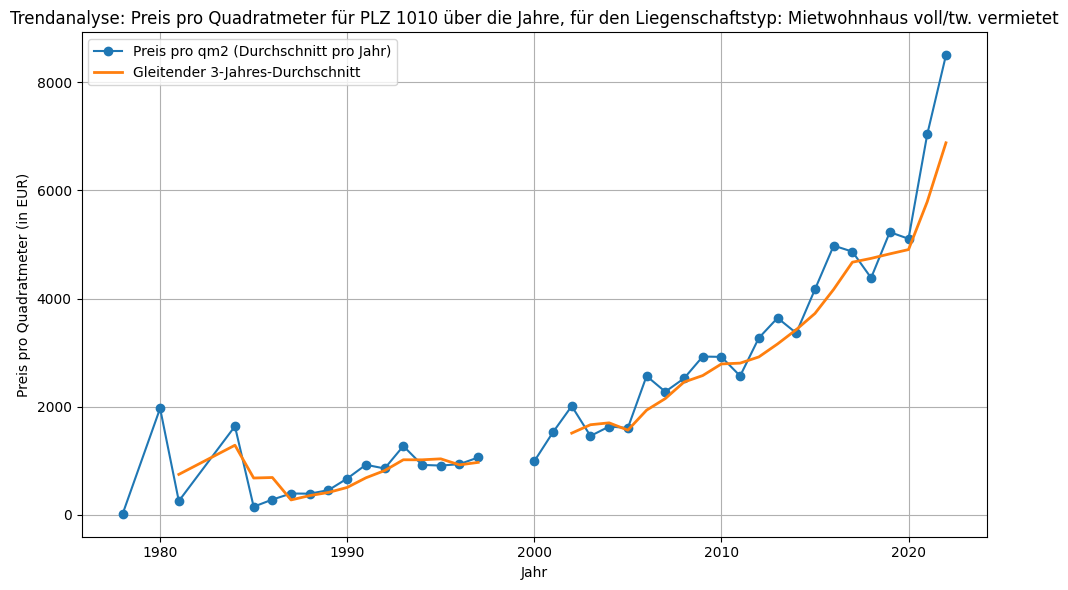

In [24]:
plot_price_trend(df, 1010, 'Mietwohnhaus voll/tw. vermietet')

In [25]:
df = df[df['Erwerbsdatum'] >= pd.to_datetime("2000-01-01")]

In [26]:
len(df)

31521

# Training

In [27]:
pre_train_df = df.copy()

In [28]:
pre_train_df.columns

Index(['PLZ', 'Erwerbsdatum', 'Liegenschaftstyp', 'Kaufpreis', 'Fläche',
       'Widmung', 'Preis pro qm2'],
      dtype='object')

In [29]:
pre_train_df = pre_train_df.drop("Preis pro qm2", axis=1)
pre_train_df = pre_train_df.drop("Widmung", axis=1)

pre_train_df['Liegenschaftstyp_Nummer'] = pre_train_df['Liegenschaftstyp'].astype('category').cat.codes
pre_train_df['Liegenschaftstyp_Nummer'] = pre_train_df['Liegenschaftstyp_Nummer'].astype(int)
num_to_liegenschaft_mapping = pre_train_df[['Liegenschaftstyp_Nummer', 'Liegenschaftstyp']].drop_duplicates()
print(num_to_liegenschaft_mapping)
pre_train_df = pre_train_df.drop("Liegenschaftstyp", axis=1)

       Liegenschaftstyp_Nummer                   Liegenschaftstyp
0                            0                      Abbruchobjekt
1                            8    Mietwohnhaus voll/tw. vermietet
4                           12                           unbebaut
5                            9                          Sonstiges
7                            4             Ein-, Zweifamilienhaus
11                          10                              Villa
15                           6               Landwirtsch. Nutzung
257                          1                     Betriebsobjekt
2589                         5                        Kleingarten
10483                        7                  Mietwohnhaus leer
15117                       11                         Weingarten
22972                        2       Büro- u./o. Geschäftsgebäude
23467                        3  Büro- u./o. Geschäftsgebäude leer


In [30]:
pre_train_df.head(5)

,PLZ,Erwerbsdatum,Kaufpreis,Fläche,Liegenschaftstyp_Nummer
0,1210,2021-10-13,750000.0,755.0,0
1,1210,2021-09-13,1250000.0,510.0,8
2,1130,2021-08-10,480000.0,456.0,0
3,1130,2020-12-30,1600000.0,523.0,0
4,1100,2020-11-04,15000000.0,12768.0,12


In [31]:
type(pre_train_df["Erwerbsdatum"][0])

pandas._libs.tslibs.timestamps.Timestamp